In [2]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
from pp import kdata
%matplotlib inline

In [14]:
kdatasvc = kdata.KDataSvc("203.67.19.12")
today = date.today()
start_date = date(today.year - 2, today.month, today.day)
end_date = today
klist = kdatasvc.getdata("2330.TW", 8, start_date, end_date)
X = kdatasvc.klist_to_nparray(klist)

[(17, -1), (26, 1), (29, -1), (41, 1), (49, -1), (80, 1), (110, -1), (114, 1), (124, -1), (139, 1), (163, -1), (168, 1), (173, -1), (182, 1), (185, -1), (198, 1), (220, -1), (235, 1), (241, -1), (243, 1), (262, -1), (302, 1), (306, -1), (310, 1), (312, -1), (326, 1), (338, -1), (357, 1), (361, -1), (365, 1), (368, -1), (378, 1), (407, -1), (419, 1), (425, -1), (430, 1), (433, -1), (449, 1), (477, -1)]


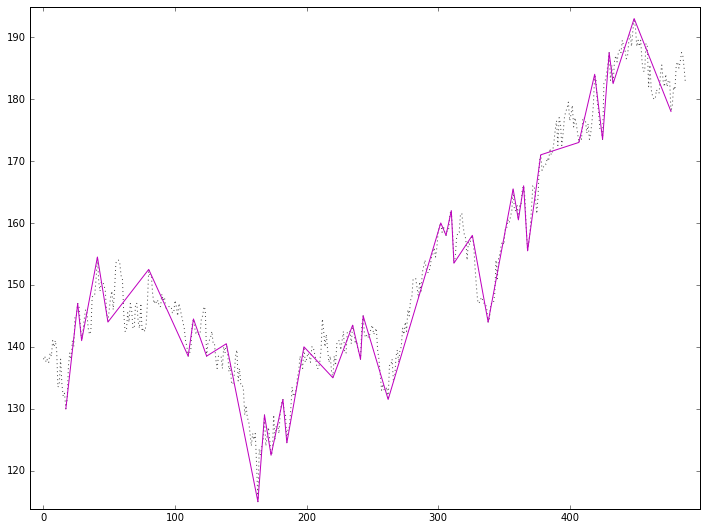

In [15]:
def is_low(X, cur, dist):
    """
    Check if X[cur] is the lowest between cur-dist..cur-1 and cur+1..cur+dist
    :param X: array of price
    :param cur: current point
    :param dist: fractal distance
    :return: true or false
    """
    if cur < dist or cur >= len(X) - dist:
        return False
    left_all = all(X[cur] < X[i] for i in range(cur-dist, cur))
    right_all = all(X[cur] < X[i] for i in range(cur+1, cur+1+dist))
    return left_all and right_all


def is_high(X, cur, dist):
    """
    Check if X[cur] is the highest between cur-dist..cur-1 and cur+1..cur+dist
    :param X: array of price
    :param cur: current point
    :param dist: fractal distance
    :return: true or false
    """
    if cur < dist or cur >= len(X) - dist:
        return False
    left_all = all(X[cur] > X[i] for i in range(cur-dist, cur))
    right_all = all(X[cur] > X[i] for i in range(cur+1, cur+1+dist))
    return left_all and right_all


def find_high(X, cur, dist):
    """
    Find the next high point, starting from cur.
    :param X: array of price
    :param cur: current point
    :param dist: fractal distance
    :return: index of the high point, or -1
    """
    while cur < len(X):
        if is_high(X, cur, dist):
            return cur
        cur += 1
    return -1


def find_low(X, cur, dist):
    """
    Find the next low point, starting from cur.
    :param X: array of price
    :param cur: current point
    :param dist: fractal distance
    :return: index of the high point, or -1
    """
    while cur < len(X):
        if is_low(X, cur, dist):
            return cur
        cur += 1
    return -1


def find_first_point(X, dist):
    """
    Find the first n-fractal point. return (index, direction)
    :param X: array of price
    :param dist: fractal distance
    :return: (index, direction), where direction = 1(high), -1(low). Or (0, 0) if not found.
    """
    cur = dist
    while cur < len(X):
        if is_high(X, cur, dist):
            return cur, 1
        if is_low(X, cur, dist):
            return cur, -1
        cur += 1
    return 0, 0


def find_all_points(X, dist):
    """
    Find the N-fractal points in X
    :param X: array of price
    :param dist: fractal distance
    :return: array of (index, direction) of all fractal points
    """
    ret = []
    idx, curr_dir = find_first_point(X, dist)
    if idx == 0:
        return ret
    ret.append((idx, curr_dir))
    while idx < len(X):
        if curr_dir == 1:
            idx = find_low(X, idx+1, dist)
            if idx < 0:
                break
            else:
                ret.append((idx, -1))
                curr_dir = -1
        else:
            idx = find_high(X, idx+1, dist)
            if idx < 0:
                break
            else:
                ret.append((idx, 1))
                curr_dir = 1
    return ret


def plot_points(X, points):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    ax.set_xlim(-10, len(X)+10)
    ax.set_ylim(X.min()*0.99, X.max()*1.01)
    ax.plot(np.arange(len(X)), X, 'k:', alpha=0.7)
    x = [p[0] for p in points]
    y = [X[p[0]] for p in points]
    ax.plot(x, y, 'm-')
    plt.show()


dist = 5
points = find_all_points(X, dist)
print points
plot_points(X, points)